## Exploratory Analysis

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import json
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [37]:
listings_data = pd.read_csv("listings.csv", low_memory=False)
reviews_data = pd.read_csv('reviews.csv')

In [38]:
listings_review=listings_data[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                              'review_scores_communication','review_scores_location','review_scores_value',
                              'review_scores_rating']]

In [39]:
listings = listings_data[['id','neighbourhood','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','price','host_since',
    'guests_included','minimum_nights','number_of_reviews','review_scores_rating','instant_bookable','cancellation_policy']]

In [40]:
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)

In [41]:
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [42]:
# Create a series to group listings by year and convert to a dataframe
result = listings.groupby(listings['host_since'].map(lambda x: x.year)).id.count()
year = pd.DataFrame(result)

In [43]:
# Rename column id to listings and reset index
year.rename(columns={'id':'listings'}, inplace=True)
year = pd.DataFrame(year).reset_index()

In [44]:
year['total listings']= year['listings'].cumsum(axis=0)

In [45]:
year['host_since'] = year['host_since'].astype(int)

In [46]:
year.rename(columns={'host_since':'year'}, inplace=True)

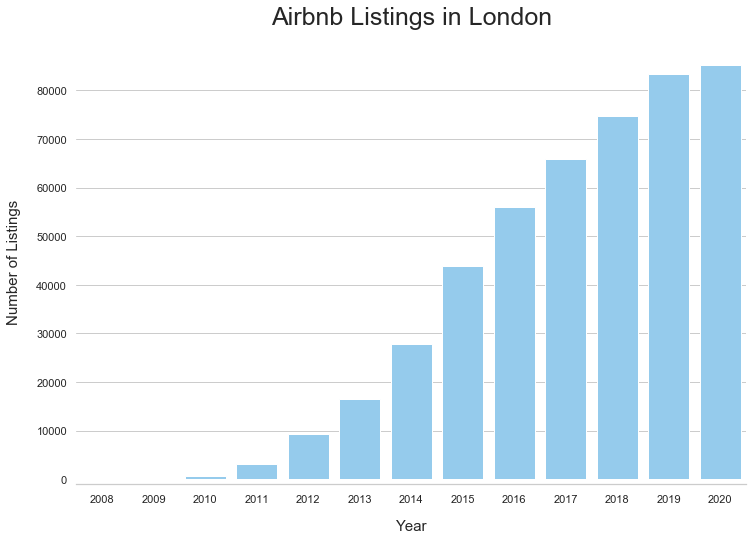

In [47]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x="year", y="total listings", data=year, color='lightskyblue')
ax.set_title('Airbnb Listings in London',fontsize=25,pad=20) # Give the plot a main title
ax.set_xlabel('Year',fontsize=15, labelpad=15) # Set text for the x axis,
ax.set_ylabel('Number of Listings',fontsize=15, labelpad=15)# Set text for y axis  
sns.despine(offset=5, left=True)

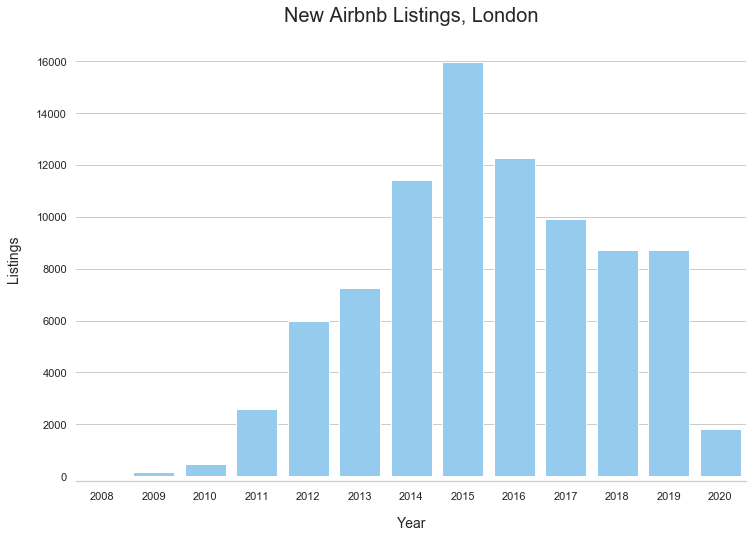

In [48]:
# Plot new Airbnb listings over time
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x='year', y="listings", data=year, color='lightskyblue')
ax.set_title('New Airbnb Listings, London',fontsize=20,pad=20) # Give the plot a main title
ax.set_xlabel('Year',fontsize=14, labelpad=15) # Set text for the x axis,
ax.set_ylabel('Listings',fontsize=14, labelpad=15)# Set text for y axis  
sns.despine(offset=5, left=True)

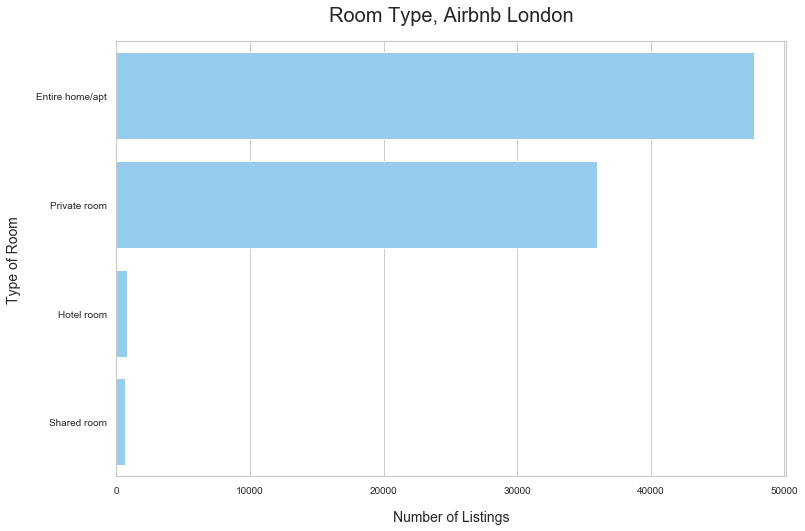

In [49]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.axes.set_title("Room Type, Airbnb London",fontsize=20, pad=20)
ax = sns.countplot(y='room_type',data=listings,order=listings['room_type'].value_counts().index, color='lightskyblue')
ax.set_xlabel('Number of Listings',fontsize=14,labelpad=15)
ax.set_ylabel('Type of Room',fontsize=14,labelpad=15)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

In [50]:
listings.columns

Index(['id', 'neighbourhood', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'price',
       'host_since', 'guests_included', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

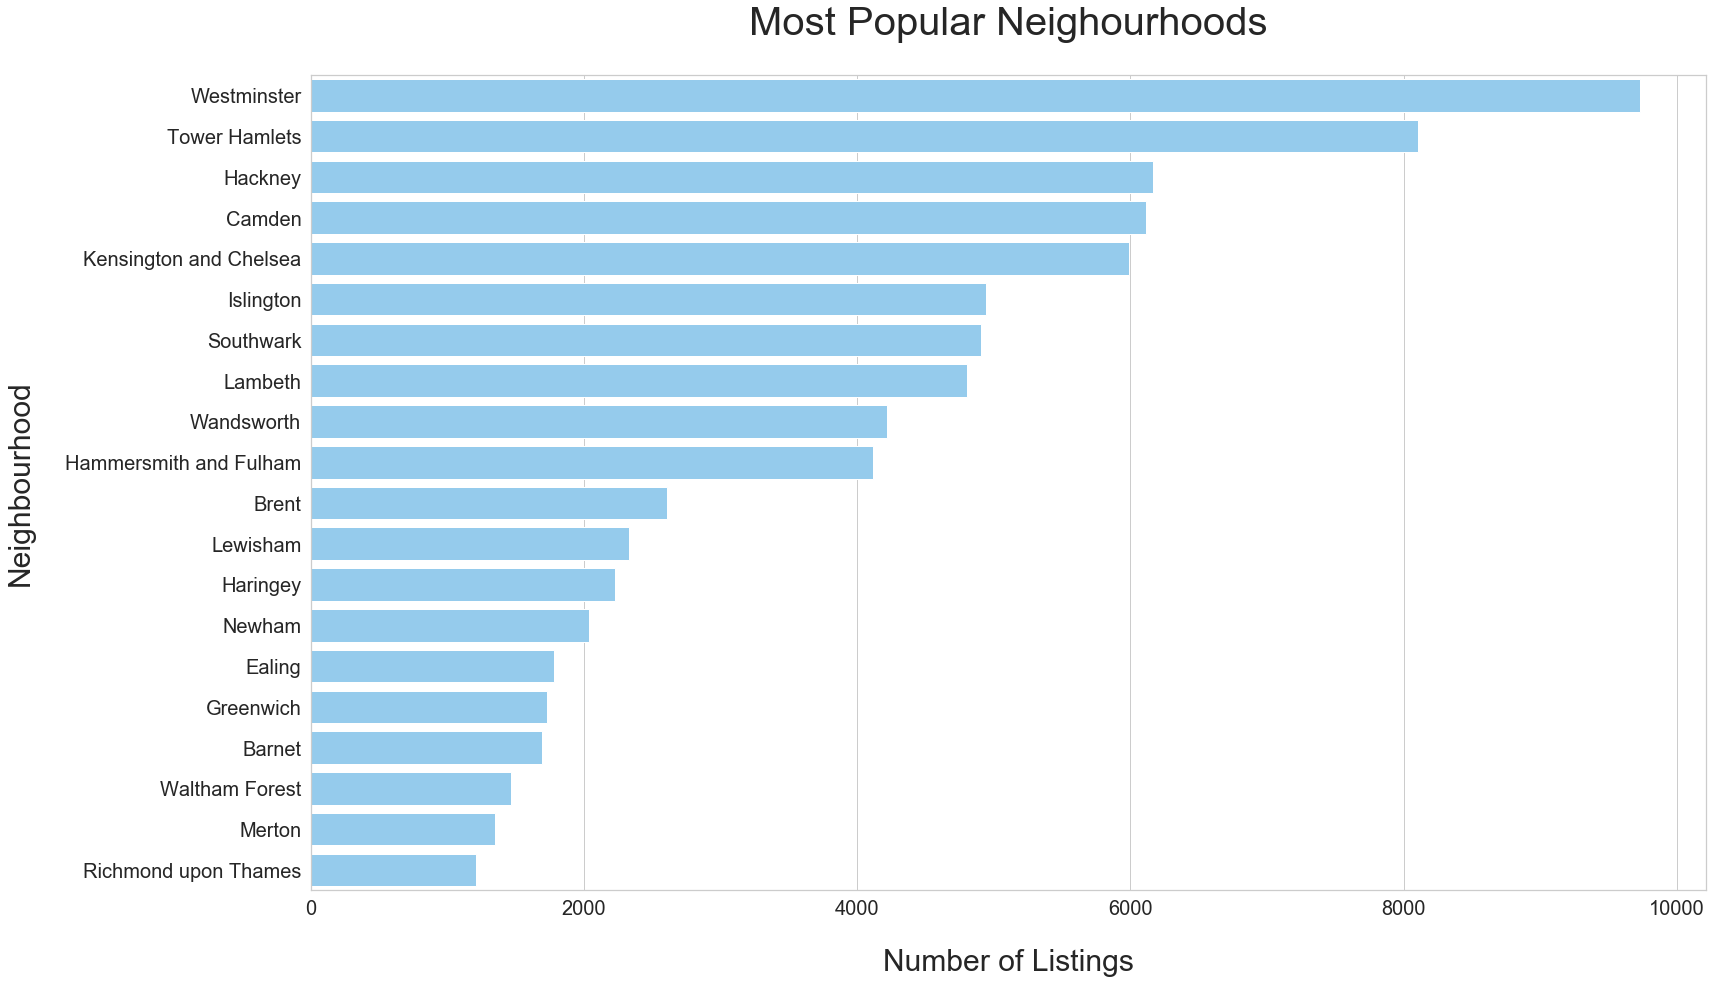

In [51]:
# Plot top 20 neighbourhoods in terms listings
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Most Popular Neighourhoods",fontsize=40,pad=40)
ax = sns.countplot(y='neighbourhood_cleansed',data=listings, order = listings['neighbourhood_cleansed'].value_counts().iloc[:20].index, color='lightskyblue')
ax.set_xlabel('Number of Listings',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [52]:
# Create a list of top 20 neighbourhoords in terms of listings
top = listings['neighbourhood_cleansed'].value_counts().iloc[:20].index.tolist()

In [53]:
# Create a dataframe to group neighbourhoods by average room price
price = pd.DataFrame(listings.groupby(['neighbourhood_cleansed']).price.mean().reset_index())

# Create a dataframe to filter top 20 neighbourhoods
top_price = price[price['neighbourhood_cleansed'].isin(top)].sort_values('price',ascending=False)

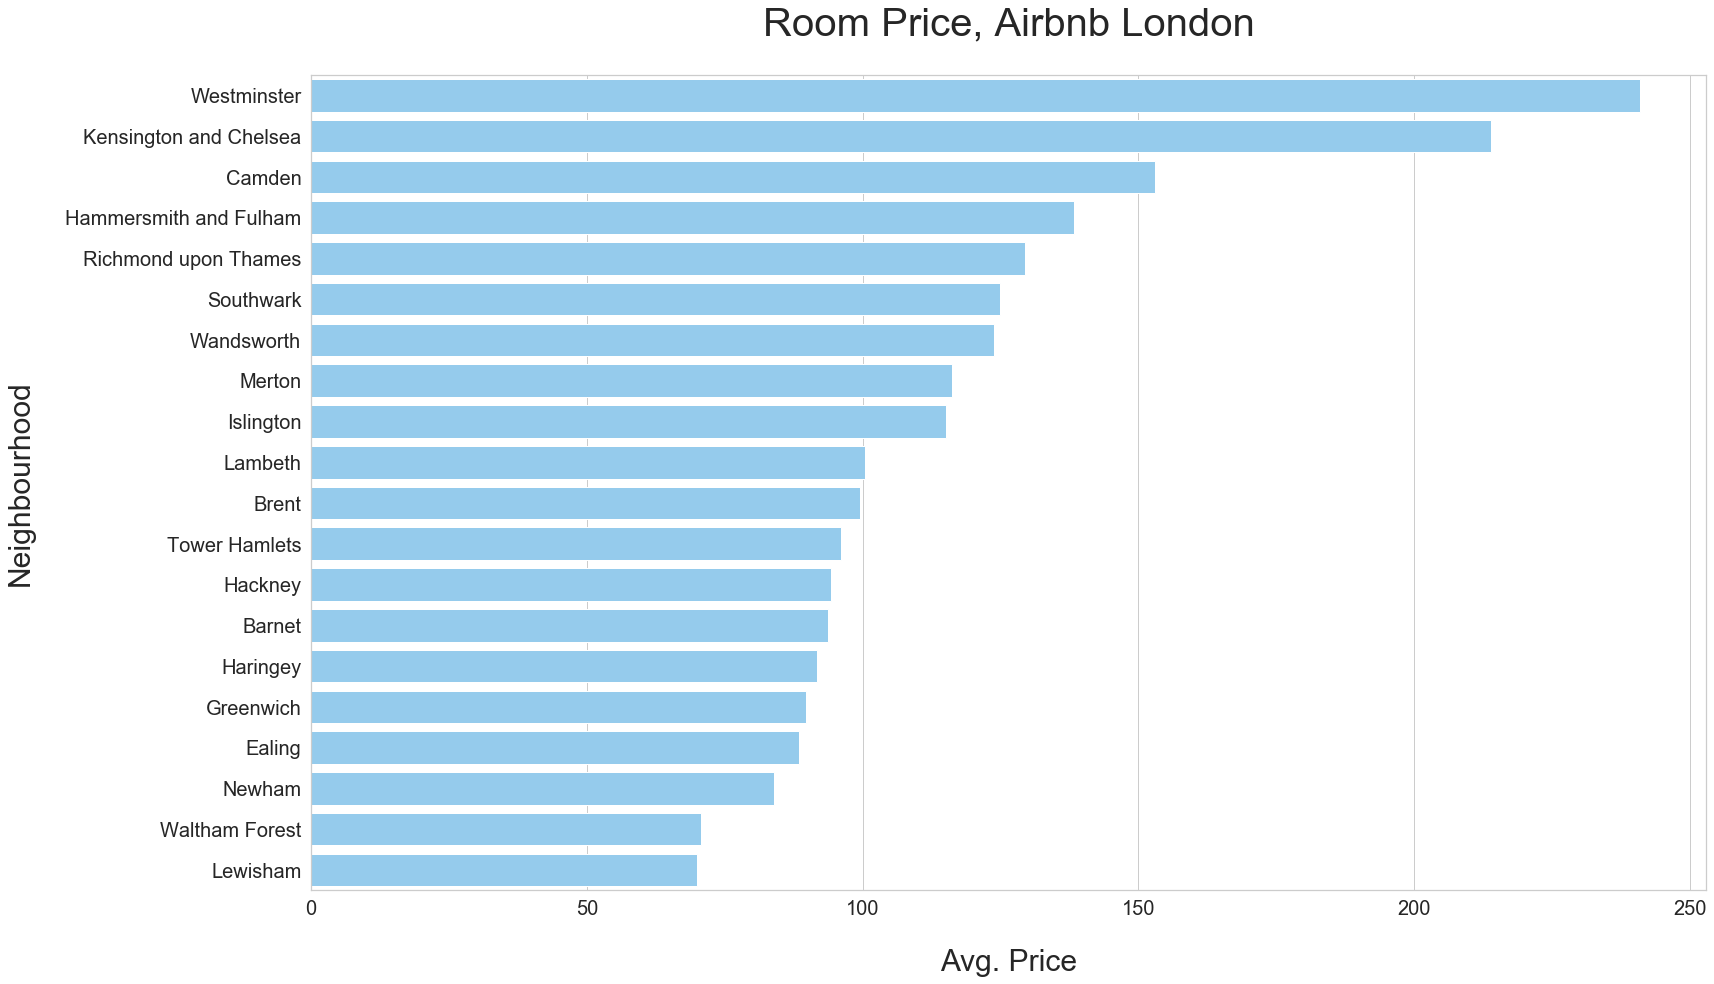

In [54]:
# Barplot of price by neighbourhood, top 20 neighbourhoods in terms of listings
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Room Price, Airbnb London",fontsize=40, pad=40)
ax = sns.barplot(x='price', y='neighbourhood_cleansed',data=top_price, color='lightskyblue')
ax.set_xlabel('Avg. Price',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [55]:
x = listings["review_scores_rating"]
df = pd.DataFrame(x)
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df = df.dropna(subset=["review_scores_rating"])

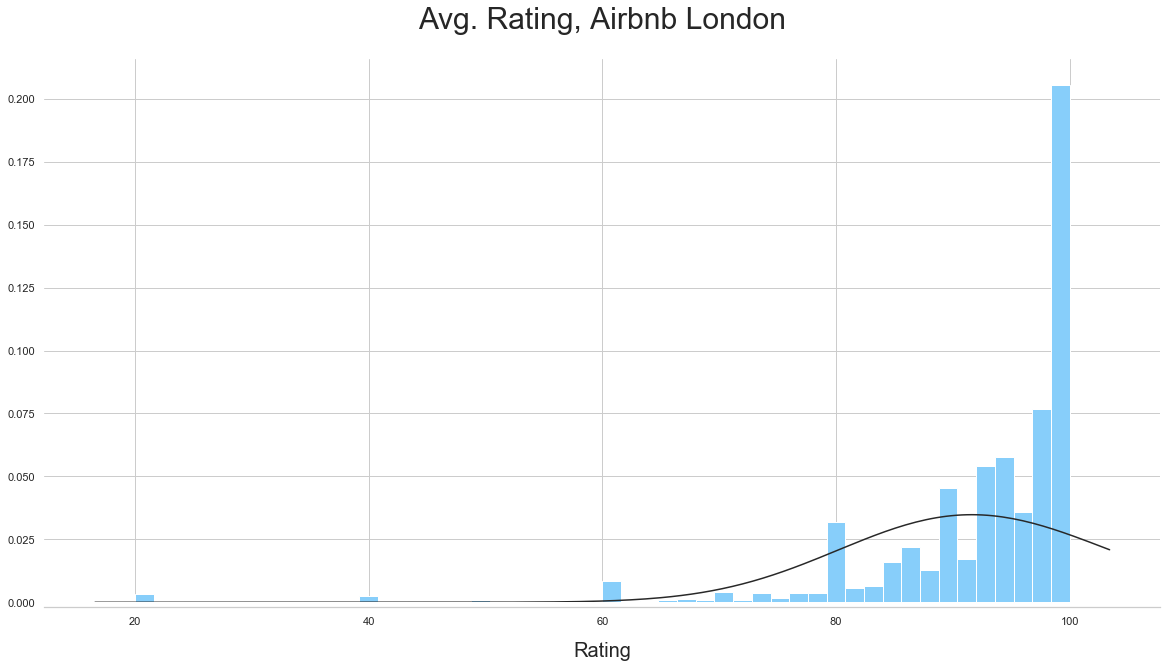

In [56]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.distplot(df["review_scores_rating"], kde=False, fit=stats.gamma, color='lightskyblue',hist_kws=dict(alpha=1))
ax.set_title('Avg. Rating, Airbnb London',fontsize=30,pad=30) # Give the plot a main title
ax.set_xlabel('Rating',fontsize=20, labelpad=15) # Set text for the x axis,

sns.despine(offset=5, left=True)

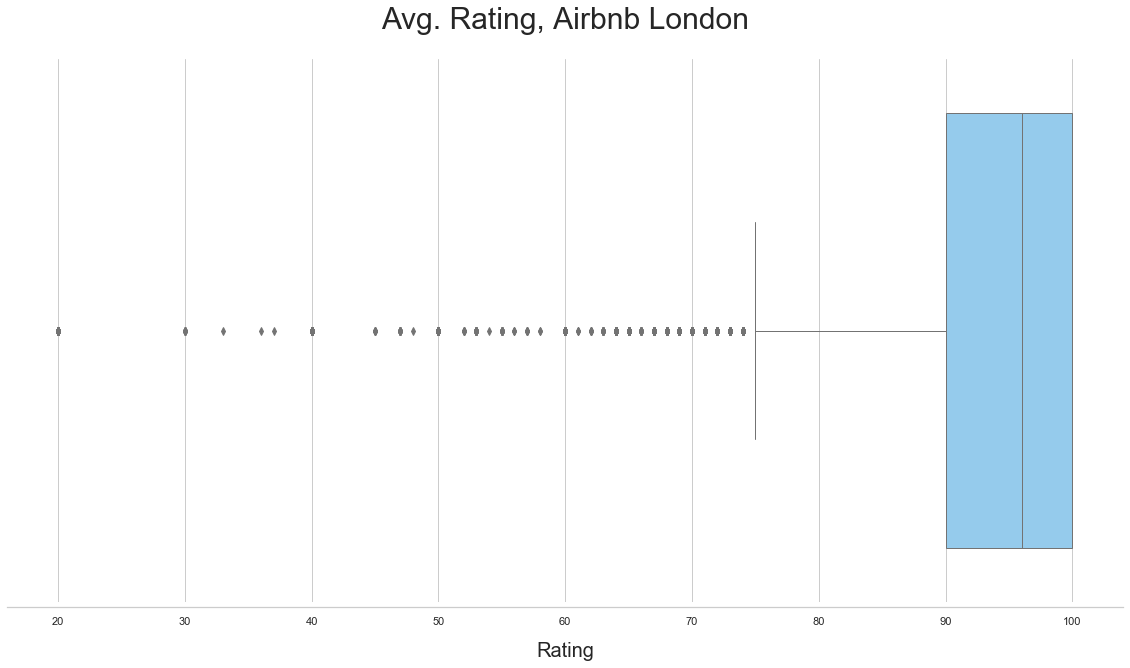

In [57]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.boxplot(x=listings["review_scores_rating"], linewidth=1, color='lightskyblue')
ax.set_title('Avg. Rating, Airbnb London',fontsize=30,pad=30) # Give the plot a main title
ax.set_xlabel('Rating',fontsize=20, labelpad=15) # Set text for the x axis,

sns.despine(offset=5, left=True)

Text(0.5, 1.0, 'Review score Value')

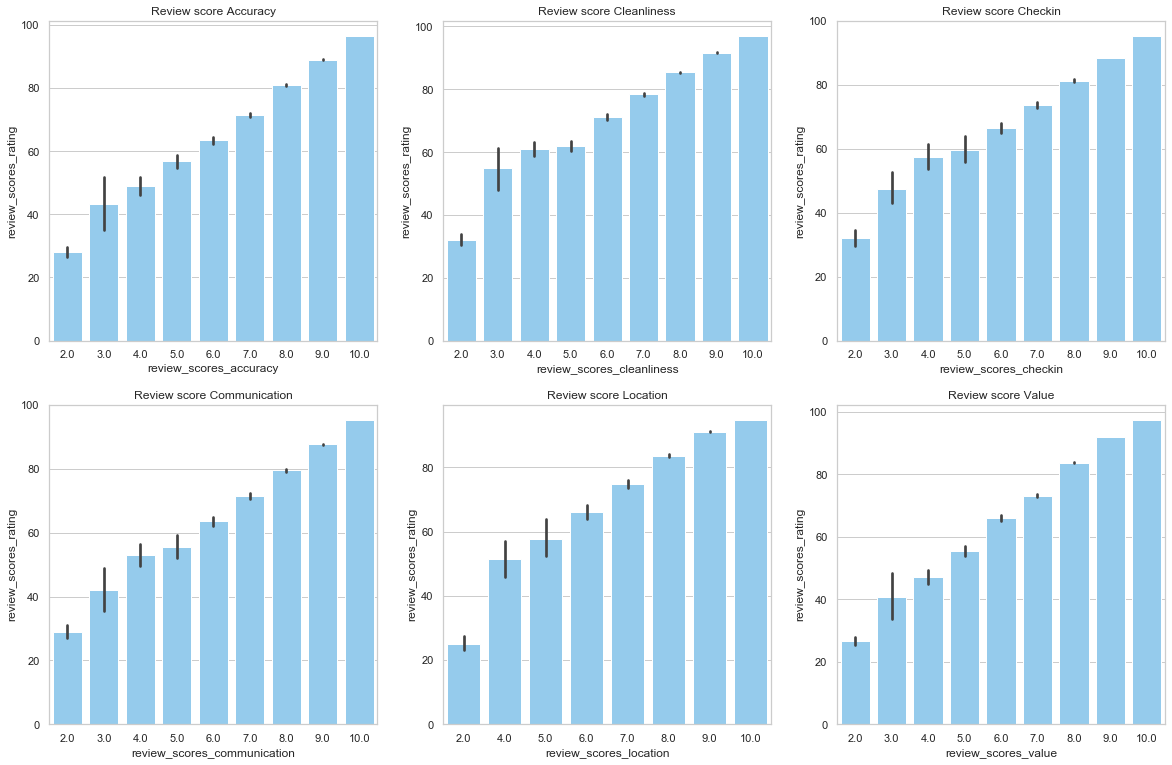

In [58]:
f = plt.figure(figsize=(20, 20))
gs = f.add_gridspec(3, 3)
ax=f.add_subplot(gs[0,0])
sns.barplot(x='review_scores_accuracy',y='review_scores_rating', data = listings_review, color='lightskyblue')
plt.title('Review score Accuracy')
ax=f.add_subplot(gs[0,1])
sns.barplot(x='review_scores_cleanliness',y='review_scores_rating',data = listings_review, color='lightskyblue')
plt.title('Review score Cleanliness')
ax=f.add_subplot(gs[0,2])
sns.barplot(x='review_scores_checkin',y='review_scores_rating',data = listings_review, color='lightskyblue')
plt.title('Review score Checkin')
ax=f.add_subplot(gs[1,0])
sns.barplot(x='review_scores_communication',y='review_scores_rating',data = listings_review, color='lightskyblue')
plt.title('Review score Communication')
ax=f.add_subplot(gs[1,1])
sns.barplot(x='review_scores_location',y='review_scores_rating',data = listings_review, color='lightskyblue')
plt.title('Review score Location')
ax=f.add_subplot(gs[1,2])
sns.barplot(x='review_scores_value',y='review_scores_rating',data = listings_review, color='lightskyblue')
plt.title('Review score Value')

In [59]:
# Rename column from date to review_date in the reviews data
reviews_data.rename(columns={'date':'review_date'}, 
                 inplace=True)

In [60]:
reviews_data['review_date'] = pd.to_datetime(reviews_data['review_date'])

In [61]:
reviews_data['month_year'] = reviews_data.review_date.dt.to_period('M')
reviews_data['year'] = reviews_data.review_date.apply(lambda x: x.year)
reviews_data['month'] = reviews_data.review_date.apply(lambda x: x.month)

In [62]:
reviews_year = pd.DataFrame(reviews_data.groupby(['year']).review_date.count().reset_index())

In [63]:
# Rename column from review_date to reviews
reviews_year.rename(columns={'review_date':'reviews'}, 
                 inplace=True)

In [70]:
# Create new column for bookings, estimate bookings by mupltiplying reviews by 2
reviews_year['bookings'] = reviews_year['reviews']*1.4

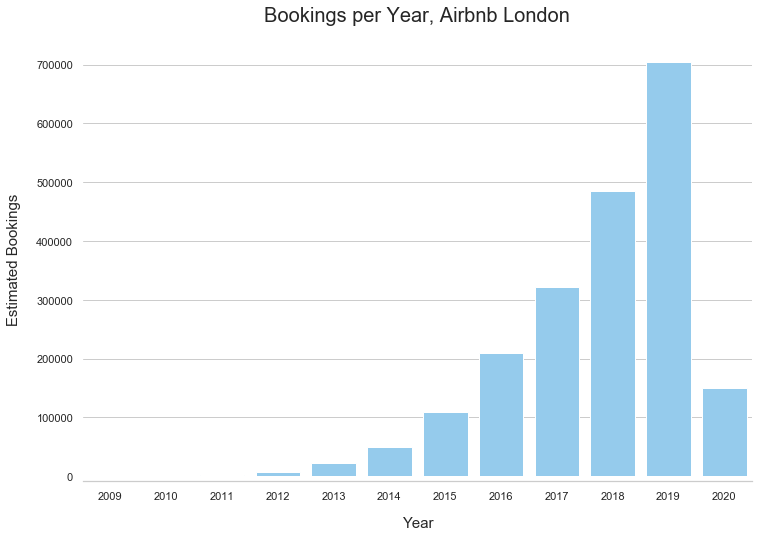

In [71]:
#Plot bookings per year
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x="year", y="bookings", data=reviews_year, color='lightskyblue')
ax.set_title('Bookings per Year, Airbnb London',fontsize=20,pad=20) # Give the plot a main title
ax.set_xlabel('Year',fontsize=15, labelpad=15) # Set text for the x axis,
ax.set_ylabel('Estimated Bookings',fontsize=15, labelpad=15)# Set text for y axis  
sns.despine(offset=5, left=True)

In [66]:
demand = year.merge(reviews_year, on='year')

In [67]:
# Create new columns for booked nights and available nights
demand['booked nights'] = demand['bookings']*2
demand['available nights'] = demand['total listings']*365

In [68]:
# Create new feature occupancy rate, booked nights divided by available nights
demand['occupancy rate'] = demand['booked nights']/demand['available nights']*100

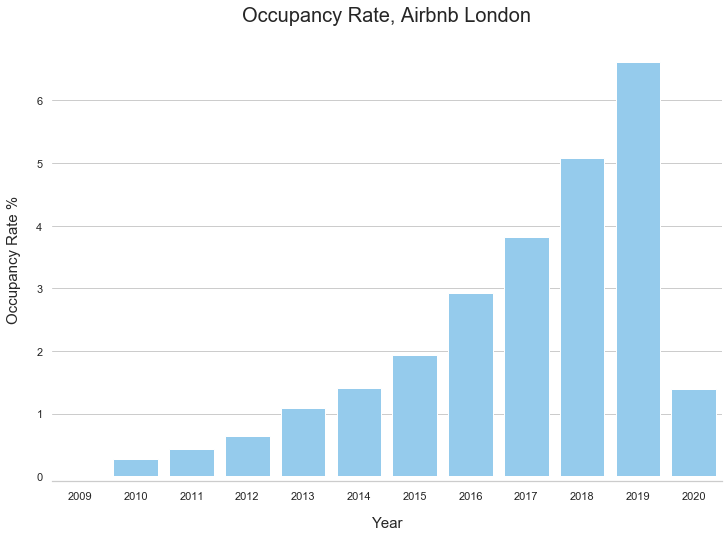

In [69]:
# Plot occupancy rate
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x="year", y="occupancy rate", data=demand, color='lightskyblue')
ax.set_title('Occupancy Rate, Airbnb London',fontsize=20,pad=20) # Give the plot a main title
ax.set_xlabel('Year',fontsize=15, labelpad=15) # Set text for the x axis,
ax.set_ylabel('Occupancy Rate %',fontsize=15, labelpad=15)# Set text for y axis  
sns.despine(offset=5, left=True)